<a href="https://colab.research.google.com/github/tiwarikaran/Time-Series/blob/main/Time_Series_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('sample_data/jha_sir.csv');df

,year,yeild
0,2003,210
1,2004,205
2,2005,180
3,2006,190
4,2007,185
5,2008,185
6,2009,180
7,2010,175
8,2011,170


In [93]:
df['yeild'][::-1]

8    170
7    175
6    180
5    185
4    185
3    190
2    180
1    205
0    210
Name: yeild, dtype: int64

In [94]:
df['yeild']=df['yeild'][::-1].values;df

,year,yeild
0,2003,170
1,2004,175
2,2005,180
3,2006,185
4,2007,185
5,2008,190
6,2009,180
7,2010,205
8,2011,210


In [95]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('yeild~year', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  yeild   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     23.99
Date:                Thu, 17 Dec 2020   Prob (F-statistic):            0.00176
Time:                        06:43:54   Log-Likelihood:                -28.787
No. Observations:                   9   AIC:                             61.57
Df Residuals:                       7   BIC:                             61.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8343.0833   1741.560     -4.791      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


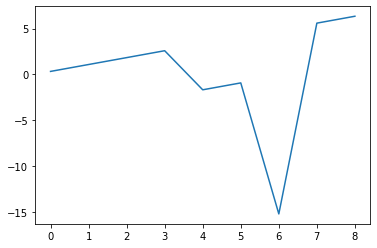

In [144]:
plt.plot((model.resid.values))

In [98]:
for i in range(0,df.shape[0]-2):
  print(i,(df['yeild'][i:i+3].sum()))

0 525
1 540
2 550
3 560
4 555
5 575
6 595


In [99]:
l = []
for i in range(0,df.shape[0]-2):
  l.append(df['yeild'][i:i+3].sum())

In [100]:
l

[525, 540, 550, 560, 555, 575, 595]

In [101]:
l = np.array(l)

In [102]:
l

array([525, 540, 550, 560, 555, 575, 595])

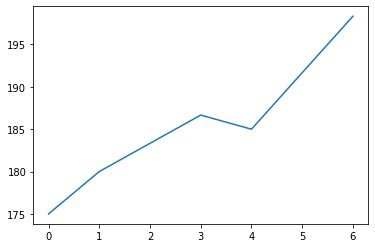

In [103]:
plt.plot(l/3)

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.array(df['year']).reshape(-1,1),np.array(df['yeild']).reshape(-1,1))
y_cap = lr.predict(np.array(df['year']).reshape(-1,1))

In [111]:
ll = np.array([0,525, 540, 550, 560, 555, 575, 595,0])

In [112]:
df['ma'] = ll/3
df

,year,yeild,ma,y_cap
0,2003,170,0.000000,169.666667
1,2004,175,175.000000,173.916667
2,2005,180,180.000000,178.166667
3,2006,185,183.333333,182.416667
4,2007,185,186.666667,186.666667
5,2008,190,185.000000,190.916667
6,2009,180,191.666667,195.166667
7,2010,205,198.333333,199.416667
8,2011,210,0.000000,203.666667


In [108]:
df['y_cap'] = y_cap
df

,year,yeild,ma,y_cap
0,2003,170,0.000000,169.666667
1,2004,175,198.333333,173.916667
2,2005,180,191.666667,178.166667
3,2006,185,185.000000,182.416667
4,2007,185,186.666667,186.666667
5,2008,190,183.333333,190.916667
6,2009,180,180.000000,195.166667
7,2010,205,175.000000,199.416667
8,2011,210,0.000000,203.666667


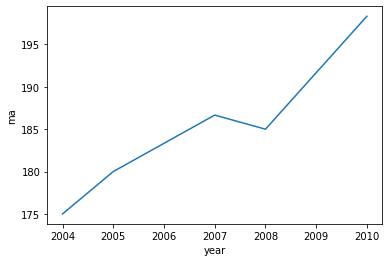

In [113]:
sns.lineplot(x = 'year',y = 'ma',data = df[1:8])

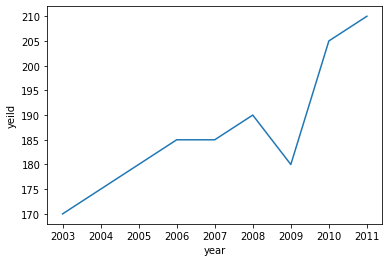

In [114]:
sns.lineplot(x = 'year',y = 'yeild',data = df)

array([525, 540, 550, 560, 555, 575, 595])

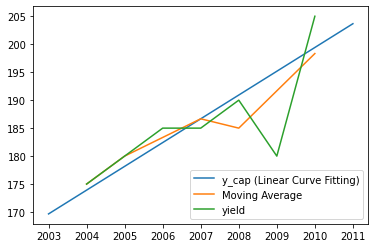

In [136]:
plt.plot(df['year'],df['y_cap'],label = 'y_cap (Linear Curve Fitting)')
plt.plot(df['year'][1:8],df['ma'][1:8],label = 'Moving Average')
plt.plot(df['year'][1:8],df['yeild'][1:8],label = 'yield')
#plt.ylim(((0,250)))
plt.legend(loc = 4)

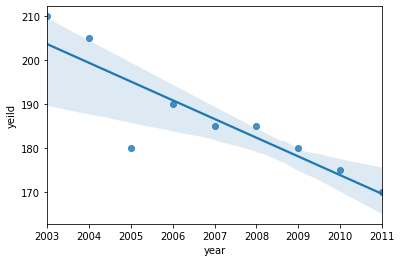

In [74]:
sns.regplot(x = 'year',y = 'yeild',data = df)

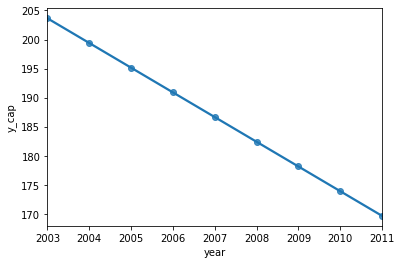

In [75]:
sns.regplot(x = 'year',y = 'y_cap',data = df)

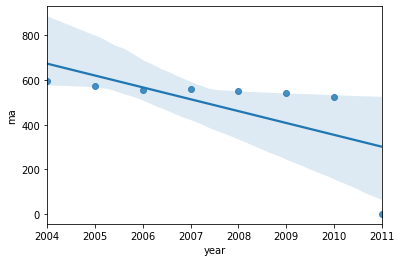

In [78]:
sns.regplot(x = 'year',y = 'ma',data = df[1:9])